### 1. Write a function to implement FFT for 1D signal.
### 2. Implement DFT function for an image using the FFT for 1D signal using q1.
### 3. Consider the images of lena and dog images attached. Find phase and magnitude of the dog and lena images using DFT function implemented in q2.
### 4. Swap phase of the dog image and magnitude of the lena image and display the output.
### 5. Swap phase of the lena image and magnitude of the dog image ad display the output.
#### Note: For all the above questions write user-defined functions and compare with predefined (in-built) function.

# Q.1

In [82]:
from cmath import exp, pi, phase
import math
def fft(x):
    n=len(x)
    if(n<=1):
        return x
    even= fft(x[0::2])
    odd = fft(x[1::2])
    
    T = []
    for k in range(n//2):
        T.append(exp(-2j*pi*k/n)*odd[k])
        
    FL = []
    FR = []
    for k in range(n//2):
        FL.append(even[k] + T[k])
        FR.append(even[k] - T[k])
    
    return FL + FR

In [83]:
def ifft(x):
    n=len(x)
    if(n<=1):
        return x
    
    even= ifft(x[0::2])
    odd = ifft(x[1::2])
    
    T = []
    for k in range(n//2):
        T.append(exp(2j*pi*k/n)*odd[k])
        
    FL = []
    FR = []
    for k in range(n//2):
        FL.append(even[k] + T[k])
        FR.append(even[k] - T[k])
        
    return FL + FR

In [84]:
points = [0,1,2,3,4,5,6,7]
temp1 = fft(points)
print(temp1)
temp2 = ifft(temp1)
temp2 = [int(abs(i)/8) for i in temp2]
print(temp2)

[(28+0j), (-4+9.65685424949238j), (-4+4j), (-4+1.6568542494923797j), (-4+0j), (-3.9999999999999996-1.6568542494923797j), (-3.9999999999999996-4j), (-3.9999999999999987-9.65685424949238j)]
[0, 1, 2, 3, 4, 5, 6, 7]


# Q.2

lena shape = (512, 512)
dog shape = (512, 512)


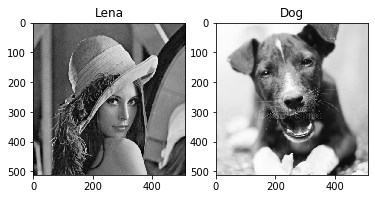

In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

lena = cv2.imread("Lena.png")
lena = cv2.cvtColor(lena,cv2.COLOR_RGB2GRAY)
dog = cv2.imread("dog.png")
dog = cv2.cvtColor(dog,cv2.COLOR_RGB2GRAY)
print(f"lena shape = {lena.shape}")
print(f"dog shape = {dog.shape}")
plt.subplot(1,2,1)
plt.title("Lena")
plt.imshow(lena, cmap="gray")
plt.subplot(1,2,2)
plt.title("Dog")
plt.imshow(dog, cmap="gray")

In [86]:
def fft_2D(image):
    res = []
    #fft of each row
    for i in range(image.shape[0]):
        res.append(fft(image[i]))
    
    for i in range(len(res[0])):
        col = []
        for j in range(len(res)):
            col.append(res[j][i])
        col = fft(col)
        
        for j in range(len(res)):
            res[j][i] = col[j]
            
    return res

In [87]:
def ifft_2D(image):
    res = []
    #ifft of each row
    for i in range(len(image)):
        res.append(ifft(image[i]))
        
    for i in range(len(res[0])):
        col = []
        for j in range(len(res)):
            col.append(res[j][i])
        col = ifft(col)
        
        for j in range(len(res)):
            res[j][i]=col[j]
            
    res = np.absolute(res)
    
    return res

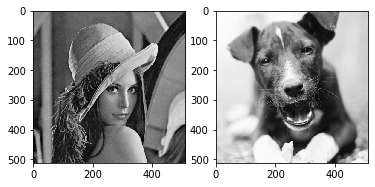

In [91]:
lena_after_fft = fft_2D(lena)
lena_after_ifft = ifft_2D(lena_after_fft)
dog_after_fft = fft_2D(dog)
dog_after_ifft = ifft_2D(dog_after_fft)
plt.subplot(1,2,1)
plt.imshow(lena_after_ifft,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(dog_after_ifft,cmap='gray')

# Q.3

(-0.5, 511.5, 511.5, -0.5)

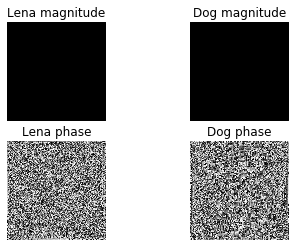

In [106]:
lena_magnitude = np.absolute(lena_after_fft) # Get the magnitude of the image.
lena_phase = np.angle(lena_after_fft) # Get the phase of the image.
dog_magnitude = np.absolute(dog_after_fft)
dog_phase = np.angle(dog_after_fft)

#lena and dog magnitude
plt.subplot(2,2,1)
plt.title("Lena magnitude")
plt.imshow(lena_magnitude, cmap="gray")
plt.axis("off")
plt.subplot(2,2,2)
plt.title("Dog magnitude")
plt.imshow(dog_magnitude, cmap="gray")
plt.axis("off")
#lena and dog phase
plt.subplot(2,2,3)
plt.title("Lena phase")
plt.imshow(lena_phase, cmap="gray")
plt.axis("off")
plt.subplot(2,2,4)
plt.title("Dog phase")
plt.imshow(dog_phase, cmap="gray")
plt.axis("off")

# Q.5

In [118]:
#lena phase and dog magnitude
# lp_dm = [[0]*512]*512
# lp_dm = np.array(lp_dm)
lp_dm = [[0 for i in range(512)] for j in range(512)]
for i in range(512):
    for j in range(512):
        lp_dm[i][j] = dog_magnitude[i][j]*exp(1j*lena_phase[i][j])

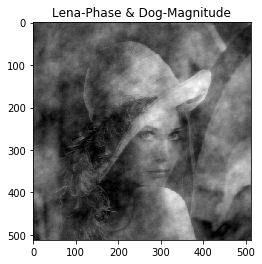

In [119]:
lpdm_ifft = ifft_2D(lp_dm)
plt.imshow(lpdm_ifft, cmap="gray")
plt.title("Lena-Phase & Dog-Magnitude")
plt.show()

# Q.4

In [120]:
#lena magnitude and dog phase
# lm_dp = [[0]*512]*512
# lm_dp = np.array(lm_dp)
lm_dp = [[0 for i in range(512)] for j in range(512)]
for i in range(512):
    for j in range(512):
        lm_dp[i][j] = lena_magnitude[i][j]*exp(1j*dog_phase[i][j])

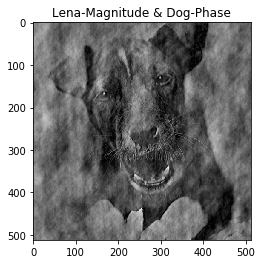

In [121]:
lmdp_ifft = ifft_2D(lm_dp)
plt.imshow(lmdp_ifft, cmap="gray")
plt.title("Lena-Magnitude & Dog-Phase")
plt.show()

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
